In [8]:
from prtsim3 import prt_sim
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import itertools

L0 = 6
Kecs = [500, 1000, 1500, 1800, 2100, 2600, 3400, 4200, 5200]
Kecs = [2100]
Es = np.arange(0.1, 1, 0.1)
Es = [0.1]
Lambdas = np.arange(0, 1.8, 0.1)
Lambdas = [-1]
longi0s = np.arange(0, 360, 20)
longi0s = [0]

for Kec,E, Lambda, longi0 in itertools.product(Kecs, Es, Lambdas, longi0s):
    input_parameters = {
        "xmu": -1, # -1 for electron, 1 for proton
        "kp": 0, # = kp + 1
        "raddist0": L0, # initial L
        "longi0": longi0, # intital phi
        'pa':90, # pitch angle
        "KEc0": Kec, # initial kinetic energy /KeV
        "timedir": 1,
        "Tout": 60,
        "Dmin": 0,
        "pulse_flag": 0, 
        "tmax": 10800, # maximum simulation time /s
    }         

    background_parameters = {
        "phi0" : np.pi/2,
        "E0" : 0.1, # mV/m
        "omega":0,
        "guass_flag":0,
        "random_phi_flag":0,
        "Lambda":Lambda
    }
    p1 = prt_sim(input_parameters, {}, background_parameters)
    sol = p1.prt_sim()

63855.147913021385
0.5


ValueError: array must not contain infs or NaNs

In [8]:
Kecs = [500, 1000, 1500, 1800, 2100, 2600, 3400, 4200, 5200]
Es = np.arange(0.1, 1, 0.1)
Lambdas = np.arange(0, 1.8, 0.1)
longi0s = np.arange(0, 360, 20)
for i,j,k in itertools.product(Es, Lambdas, longi0s):
    print(i,j,k)

0.1 0.0 0
0.1 0.0 20
0.1 0.0 40
0.1 0.0 60
0.1 0.0 80
0.1 0.0 100
0.1 0.0 120
0.1 0.0 140
0.1 0.0 160
0.1 0.0 180
0.1 0.0 200
0.1 0.0 220
0.1 0.0 240
0.1 0.0 260
0.1 0.0 280
0.1 0.0 300
0.1 0.0 320
0.1 0.0 340
0.1 0.1 0
0.1 0.1 20
0.1 0.1 40
0.1 0.1 60
0.1 0.1 80
0.1 0.1 100
0.1 0.1 120
0.1 0.1 140
0.1 0.1 160
0.1 0.1 180
0.1 0.1 200
0.1 0.1 220
0.1 0.1 240
0.1 0.1 260
0.1 0.1 280
0.1 0.1 300
0.1 0.1 320
0.1 0.1 340
0.1 0.2 0
0.1 0.2 20
0.1 0.2 40
0.1 0.2 60
0.1 0.2 80
0.1 0.2 100
0.1 0.2 120
0.1 0.2 140
0.1 0.2 160
0.1 0.2 180
0.1 0.2 200
0.1 0.2 220
0.1 0.2 240
0.1 0.2 260
0.1 0.2 280
0.1 0.2 300
0.1 0.2 320
0.1 0.2 340
0.1 0.30000000000000004 0
0.1 0.30000000000000004 20
0.1 0.30000000000000004 40
0.1 0.30000000000000004 60
0.1 0.30000000000000004 80
0.1 0.30000000000000004 100
0.1 0.30000000000000004 120
0.1 0.30000000000000004 140
0.1 0.30000000000000004 160
0.1 0.30000000000000004 180
0.1 0.30000000000000004 200
0.1 0.30000000000000004 220
0.1 0.30000000000000004 240
0.1 0.300000

In [6]:
Es = np.arange(0.1, 1, 0.1)
Es

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

(-0.0011, 0.0011)

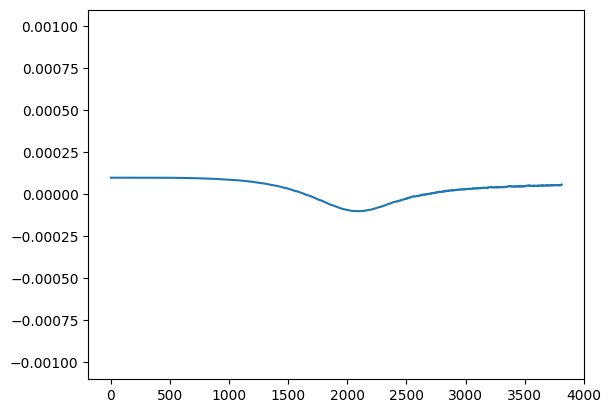

In [2]:
window_size = 30

# 计算移动平均
Es = np.convolve(p1.Es, np.ones(window_size)/window_size, mode='valid')

plt.plot(Es)
plt.ylim(-1.1e-3, 1.1e-3)

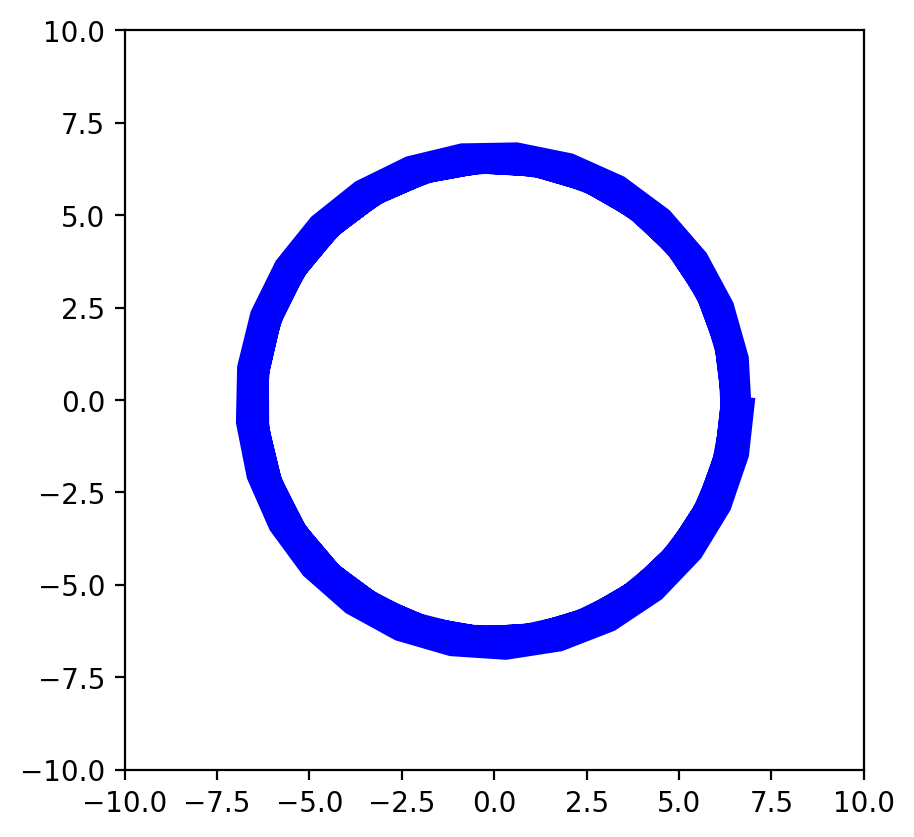

In [4]:
fig, ax = plt.subplots(dpi=200)
ax.plot(sol.y[0], sol.y[1], c='b')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')

In [18]:
np.savez("./test.npz", t=sol.t, y=sol.y)
data = np.load("./test.npz")